In [1]:

import gc
import glob
import logging
import os
import random
import re
import sys
import time
import warnings
from concurrent.futures import ThreadPoolExecutor
from pathlib import Path

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import (
    RandomizedSearchCV,
    StratifiedKFold,
    train_test_split,
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import matplotlib_inline   # setup output image format
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
from scipy import stats
random.seed(100)
import csv
from scipy import io
import pickle
from IPython.display import Audio, display
import os.path
import joblib
warnings.filterwarnings("ignore")
logging.basicConfig(level=logging.ERROR)

os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [5]:
import os
import numpy as np
import librosa
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

path = r"E:\cs5489\project\bird\train_audio"
X_list = []
y_list = []

for label in tqdm(os.listdir(path)):
    labelPath = os.path.join(path, label)      
    for file in os.listdir(labelPath):
        if file.endswith('.ogg'):
            fileP = os.path.join(labelPath, file)

            audio, sr = librosa.load(fileP, sr=None)
            mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
            length = 256
            if mfcc.shape[1] > length:
                mfcc = mfcc[:, :length]
            elif mfcc.shape[1] < length:
                pad1 = length - mfcc.shape[1]
                mfcc = np.pad(mfcc, ((0, 0), (0, pad1)), mode='constant')
            normalized = (mfcc - np.mean(mfcc, axis=1, keepdims=True)) / (np.std(mfcc, axis=1, keepdims=True) + 1e-8)
            mfcc_1d = normalized.flatten()
            X_list.append(mfcc_1d)
            y_list.append(label)

X_array = np.array(X_list)
y_array = np.array(y_list)
output = "mfcc.npz"


  0%|                                                                                          | 0/206 [00:02<?, ?it/s]


KeyboardInterrupt: 

In [2]:
np.savez(output, X=X_array, y=y_array)
print(f"保存 {output}")

保存 mfcc.npz


In [2]:
data = np.load('mfcc.npz')
X_array = data['X']
y_array = data['y']

print("X_array shape:", X_array.shape)
print("y_array shape:", y_array.shape)
print("Example label:", y_array[0])

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X_array, y_array, stratify=y_array, test_size=0.2, random_state=42
)

le = LabelEncoder()
y_train = le.fit_transform(y_train_raw)
y_test = le.transform(y_test_raw)

pca = PCA(n_components=34)
X_train_pca = pca.fit_transform(X_train_raw)
X_test_pca = pca.transform(X_test_raw)

X_array shape: (28564, 10240)
y_array shape: (28564,)
Example label: 1139490


In [3]:
def to_onehot(y, n_classes):
    y_bin = np.zeros((len(y), n_classes))
    for i, label in enumerate(y):
        y_bin[i, label] = 1
    return y_bin
#from ass2
def plot_roc(classes, y_true_bin, y_score):
    fpr_all = []
    tpr_all = []
    auc_all = []
    
    plt.figure(figsize=(10, 8))
    
    for i in range(len(classes)):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, lw=1, alpha=0.5)
        
        fpr_all.append(fpr)
        tpr_all.append(tpr)
        auc_all.append(roc_auc)
    valid_indices = [i for i, a in enumerate(auc_all) if not np.isnan(a)]

    all_fpr = np.unique(np.concatenate([fpr_all[i] for i in valid_indices]))
    mean_tpr = np.zeros_like(all_fpr)
    
    for i in valid_indices:
        mean_tpr += interp(all_fpr, fpr_all[i], tpr_all[i])
    
    mean_tpr /= len(valid_indices)
    auc_val = auc(all_fpr, mean_tpr)
    

    macro_auc = np.nanmean(auc_all)
   
    
    plt.plot(all_fpr, mean_tpr, 'k-', lw=2)
    plt.title('MCAUC={:.4f}, AUC={:.4f}'.format(macro_auc, auc_val))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.grid(True)
    
    return macro_auc, auc_all

# BNB

best: {'alpha': 10}
acc: 0.07719236828286365
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          12       0.00      0.00      0.00        15
          13       0.00      0.00      0.00         9
          14       0.00      0.00      0.00        11
          15       0.00      0.00      0.00         9
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         3
          19       0.00      0.00   

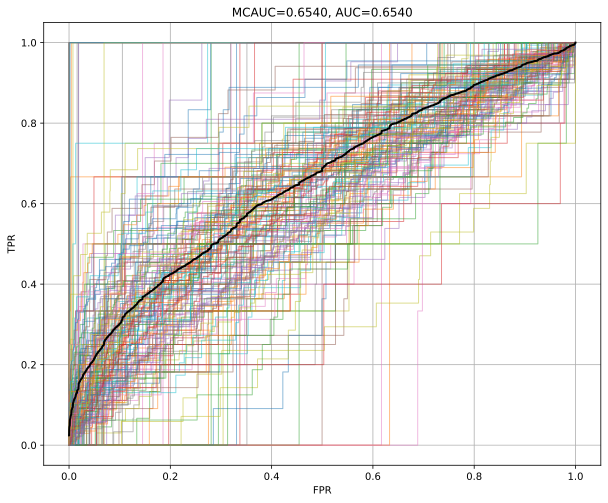

In [7]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
X_trainB = (X_train_pca > np.median(X_train_pca, axis=0)).astype(int)
X_testB = (X_test_pca > np.median(X_train_pca, axis=0)).astype(int)
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.8, 0.9, 1, 2, 5, 10, 20, 50, 100]
}
BNB = GridSearchCV(BernoulliNB(),param_grid=param_grid,cv=5,scoring='accuracy', n_jobs=-1)
BNB.fit(X_trainB, y_train)
y_pred = BNB.predict(X_testB)
acc = accuracy_score(y_test, y_pred)
print("best:", BNB.best_params_)
print("acc:", acc)
print(classification_report(y_test, y_pred))
joblib.dump(BNB.best_estimator_, "BNB.pkl")
print(BNB)

y_train_proba = BNB.predict_proba(X_trainB)
y_test_proba = BNB.predict_proba(X_testB)



classes = BNB.classes_
n_classes = len(classes)

y_train_bin = to_onehot(y_train, n_classes)
y_test_bin = to_onehot(y_test, n_classes)

macro_auc, class_aucs = plot_roc(classes, y_test_bin, y_test_proba)
print(f"mcauc: {macro_auc:.4f}")
for i, (c, auc_val) in enumerate(zip(classes, class_aucs)):
    print(f"{c}: AUC = {auc_val:.4f}")

# Multinomial Naive Bayes

best: {'alpha': 100}
acc: 0.08734465254682304
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.25      1.00      0.40         1
           5       0.00      0.00      0.00         1
           6       0.08      0.50      0.13         2
           7       0.00      0.00      0.00         1
           8       0.03      1.00      0.06         1
           9       0.02      1.00      0.04         1
          12       0.02      0.07      0.03        15
          13       0.00      0.00      0.00         9
          14       0.00      0.00      0.00        11
          15       0.00      0.00      0.00         9
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         3
          19       0.00      0.00  

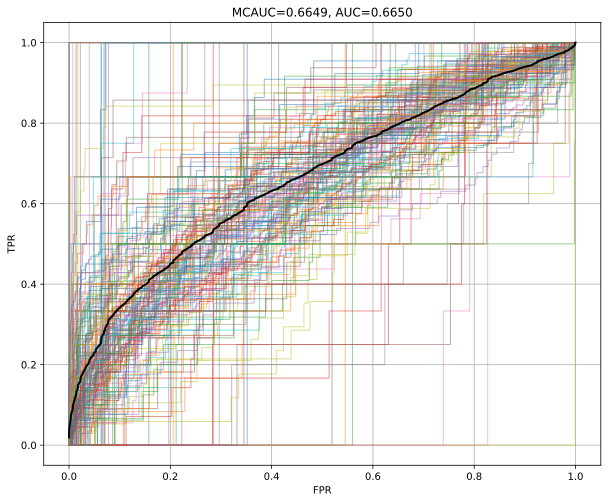

In [4]:
from sklearn.naive_bayes import MultinomialNB 

X_train_mnb = X_train_pca - X_train_pca.min(axis=0)  
X_test_mnb = X_test_pca - X_train_pca.min(axis=0)  
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.8, 0.9, 1, 2, 5, 10, 20, 50, 100]
}

MNB = GridSearchCV(MultinomialNB(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
MNB.fit(X_train_mnb, y_train)
y_pred = MNB.predict(X_test_mnb)
acc = accuracy_score(y_test, y_pred)
print("best:", MNB.best_params_)
print("acc:", acc)
print(classification_report(y_test, y_pred))
joblib.dump(MNB.best_estimator_, "MNBmfcc.pkl")
print(MNB)

y_train_proba = MNB.predict_proba(X_train_mnb)
y_test_proba = MNB.predict_proba(X_test_mnb)
classes = MNB.classes_
n_classes = len(classes)

y_train_bin = to_onehot(y_train, n_classes)
y_test_bin = to_onehot(y_test, n_classes)

macro_auc, class_aucs = plot_roc(classes, y_test_bin, y_test_proba)
print(f"mcauc: {macro_auc:.4f}")
for i, (c, auc_val) in enumerate(zip(classes, class_aucs)):
    print(f"{c}: AUC = {auc_val:.4f}")

# adaboost

Fitting 5 folds for each of 12 candidates, totalling 60 fits
best: {'learning_rate': 0.1, 'n_estimators': 200}
acc: 0.04218449151058988
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          12       0.00      0.00      0.00        15
          13       0.00      0.00      0.00         9
          14       0.00      0.00      0.00        11
          15       0.00      0.00      0.00         9
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1

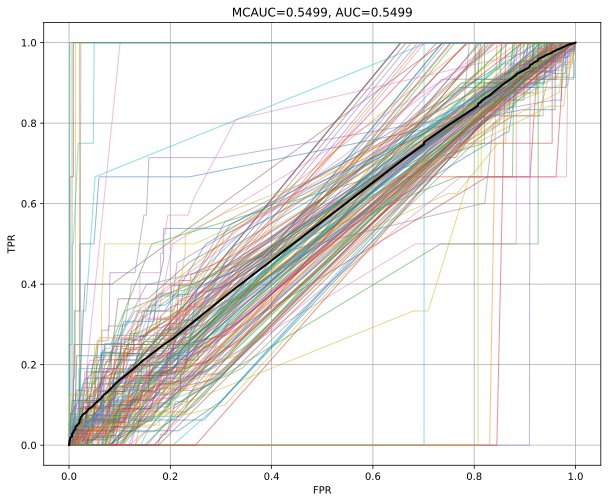

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
}

base = DecisionTreeClassifier(max_depth=1)

adaboost = GridSearchCV(AdaBoostClassifier(estimator=base), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

adaboost.fit(X_train_pca, y_train)

y_pred = adaboost.predict(X_test_pca)
acc = accuracy_score(y_test, y_pred)
print("best:", adaboost.best_params_)
print("acc:", acc)
print(classification_report(y_test, y_pred))
joblib.dump(adaboost.best_estimator_, "adaboostmfcc.pkl")
print(adaboost)

y_train_proba = adaboost.predict_proba(X_train_pca)
y_test_proba = adaboost.predict_proba(X_test_pca)
classes = adaboost.classes_
n_classes = len(classes)

y_train_bin = to_onehot(y_train, n_classes)
y_test_bin = to_onehot(y_test, n_classes)

macro_auc, class_aucs = plot_roc(classes, y_test_bin, y_test_proba)
print(f"mcauc: {macro_auc:.4f}")
for i, (c, auc_val) in enumerate(zip(classes, class_aucs)):
    print(f"{c}: AUC = {auc_val:.4f}")

# xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100,],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [ 5, 7],
    'subsample': [ 1.0],
    
}

xgboost = GridSearchCV(XGBClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

xgboost.fit(X_train_pca, y_train)

y_pred = xgboost.predict(X_test_pca)
acc = accuracy_score(y_test, y_pred)
print("best:", xgboost.best_params_)
print("acc:", acc)
print(classification_report(y_test, y_pred))
joblib.dump(xgboost.best_estimator_, "xgboostmfcc.pkl")
print(xgboost)

y_train_proba = xgboost.predict_proba(X_train_pca)
y_test_proba = xgboost.predict_proba(X_test_pca)
classes = xgboost.classes_
n_classes = len(classes)

y_train_bin = to_onehot(y_train, n_classes)
y_test_bin = to_onehot(y_test, n_classes)

macro_auc, class_aucs = plot_roc(classes, y_test_bin, y_test_proba)
print(f"mcauc: {macro_auc:.4f}")
for i, (c, auc_val) in enumerate(zip(classes, class_aucs)):
    print(f"{c}: AUC = {auc_val:.4f}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


# RF

Fitting 5 folds for each of 18 candidates, totalling 90 fits
best: {'max_depth': None, 'max_features': None, 'min_samples_split': 5, 'n_estimators': 100}
acc: 0.15683528793978646
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          12       0.20      0.07      0.10        15
          13       1.00      0.11      0.20         9
          14       0.00      0.00      0.00        11
          15       0.00      0.00      0.00         9
          16       0.00      0.00      0.00         1
          

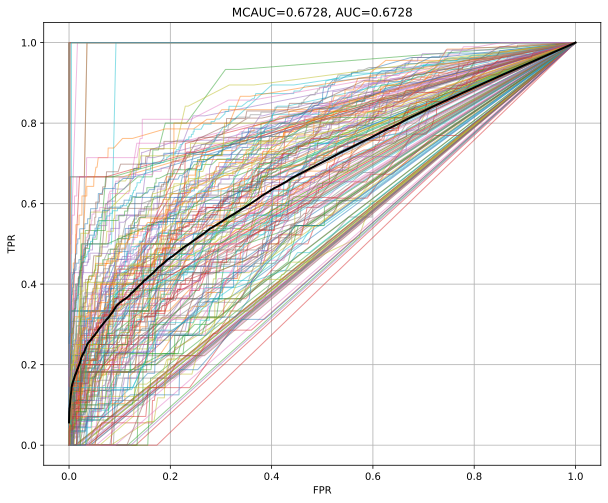

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, ],
    'max_depth': [None, 10, 20,],
    'min_samples_split': [2, 5, 10],
    'max_features': [None]
}

rf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

rf.fit(X_train_pca, y_train)

y_pred = rf.predict(X_test_pca)
acc = accuracy_score(y_test, y_pred)
print("best:", rf.best_params_)
print("acc:", acc)
print(classification_report(y_test, y_pred))
joblib.dump(rf.best_estimator_, "rfmfcc.pkl")
print(rf)

y_train_proba = rf.predict_proba(X_train_pca)
y_test_proba = rf.predict_proba(X_test_pca)
classes = rf.classes_
n_classes = len(classes)

y_train_bin = to_onehot(y_train, n_classes)
y_test_bin = to_onehot(y_test, n_classes)

macro_auc, class_aucs = plot_roc(classes, y_test_bin, y_test_proba)
print(f"mcauc: {macro_auc:.4f}")
for i, (c, auc_val) in enumerate(zip(classes, class_aucs)):
    print(f"{c}: AUC = {auc_val:.4f}")

# KNN

Fitting 5 folds for each of 12 candidates, totalling 60 fits
best: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
acc: 0.15018379135305443
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.50      1.00      0.67         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.50      1.00      0.67         1
          12       0.02      0.07      0.03        15
          13       0.06      0.11      0.07         9
          14       0.00      0.00      0.00        11
          15       0.00      0.00      0.00         9
          16       0.00      0.0

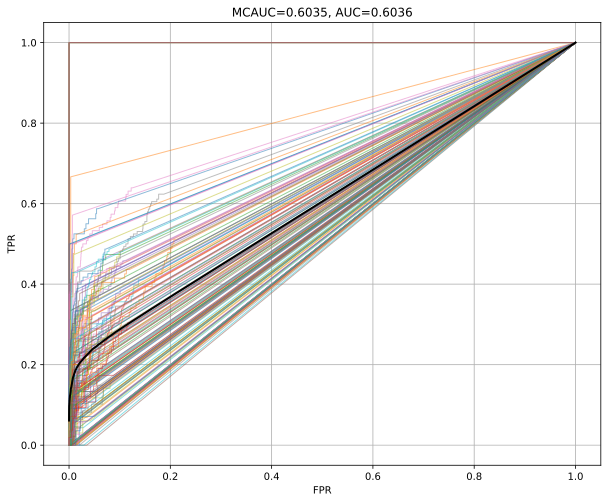

In [5]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': [3, 5, 7, ],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

KNN = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=True)
KNN.fit(X_train_pca, y_train)
y_pred = KNN.predict(X_test_pca)
acc = accuracy_score(y_test, y_pred)
print("best:", KNN.best_params_)
print("acc:", acc)
print(classification_report(y_test, y_pred))
joblib.dump(KNN.best_estimator_, "KNNmfcc.pkl")
print(KNN)

y_train_proba = KNN.predict_proba(X_train_pca)
y_test_proba = KNN.predict_proba(X_test_pca)

classes = KNN.classes_
n_classes = len(classes)

y_train_bin = to_onehot(y_train, n_classes)
y_test_bin = to_onehot(y_test, n_classes)

macro_auc, class_aucs = plot_roc(classes, y_test_bin, y_test_proba)
print(f"mcauc: {macro_auc:.4f}")
for i, (c, auc_val) in enumerate(zip(classes, class_aucs)):
    print(f"{c}: AUC = {auc_val:.4f}")

# SVM

Fitting 5 folds for each of 5 candidates, totalling 25 fits
best: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
acc: 0.05041134255207422
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          12       0.00      0.00      0.00        15
          13       1.00      0.11      0.20         9
          14       0.00      0.00      0.00        11
          15       0.00      0.00      0.00         9
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1

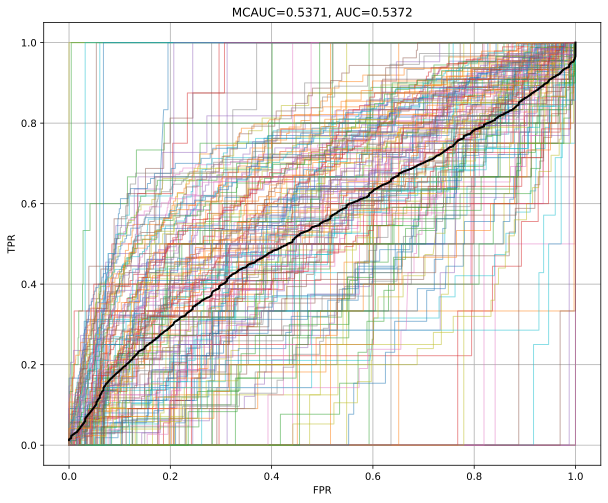

In [6]:
from sklearn.svm import SVC  

param_grid = {
    'C': [0.01,0.1, 1,  10, 100],
    'gamma': [ 'auto',],
    'kernel': ['rbf']  
}

SVM = GridSearchCV(SVC(probability=True), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1,verbose=True)
SVM.fit(X_train_pca, y_train)
y_pred = SVM.predict(X_test_pca)
acc = accuracy_score(y_test, y_pred)
print("best:", SVM.best_params_)
print("acc:", acc)
print(classification_report(y_test, y_pred))
joblib.dump(SVM.best_estimator_, "SVMmfcc.pkl")
print(SVM)


y_train_proba = SVM.predict_proba(X_train_pca)
y_test_proba = SVM.predict_proba(X_test_pca)

classes = SVM.classes_
n_classes = len(classes)

y_train_bin = to_onehot(y_train, n_classes)
y_test_bin = to_onehot(y_test, n_classes)

macro_auc, class_aucs = plot_roc(classes, y_test_bin, y_test_proba)
print(f"mcauc: {macro_auc:.4f}")
for i, (c, auc_val) in enumerate(zip(classes, class_aucs)):
    print(f"{c}: AUC = {auc_val:.4f}")

 # Decision tree

Fitting 5 folds for each of 24 candidates, totalling 120 fits
best: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10}
acc: 0.06423945387712235
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          12       0.14      0.07      0.09        15
          13       0.00      0.00      0.00         9
          14       0.00      0.00      0.00        11
          15       0.00      0.00      0.00         9
         

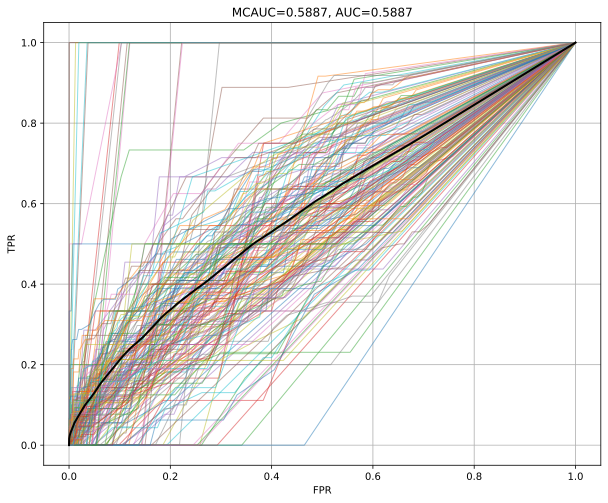

In [7]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [ 5, 10, 20],
    'min_samples_split': [ 5, 10],
    'min_samples_leaf': [ 2, 4],
    'criterion': ['gini', 'entropy']
}

DT = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=True)
DT.fit(X_train_pca, y_train)
y_pred = DT.predict(X_test_pca)
acc = accuracy_score(y_test, y_pred)
print("best:", DT.best_params_)
print("acc:", acc)
print(classification_report(y_test, y_pred))
joblib.dump(DT.best_estimator_, "DecisionTreemfcc.pkl")
print(DT)

y_train_proba = DT.predict_proba(X_train_pca)
y_test_proba = DT.predict_proba(X_test_pca)

classes = DT.classes_
n_classes = len(classes)

y_train_bin = to_onehot(y_train, n_classes)
y_test_bin = to_onehot(y_test, n_classes)

macro_auc, class_aucs = plot_roc(classes, y_test_bin, y_test_proba)
print(f"mcauc: {macro_auc:.4f}")
for i, (c, auc_val) in enumerate(zip(classes, class_aucs)):
    print(f"{c}: AUC = {auc_val:.4f}")

# MLP

Fitting 5 folds for each of 24 candidates, totalling 120 fits
best: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 200}
acc: 0.1610362331524593
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         1
          12       0.11      0.13      0.12        15
          13       0.00      0.00      0.00         9
          14       0.00      0.00      0.00        11
          15       0.00      0.00      0.00         9
          16       0.00      0.00    

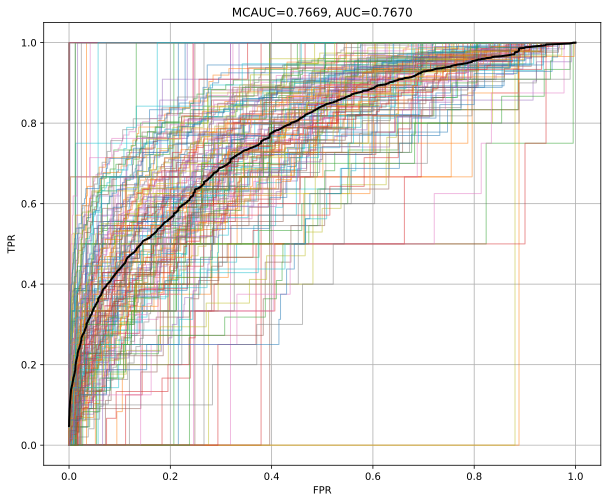

In [8]:
from sklearn.neural_network import MLPClassifier

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu',],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200] 
}

MLP = GridSearchCV(MLPClassifier(random_state=42, early_stopping=True), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=True)
MLP.fit(X_train_pca, y_train)
y_pred = MLP.predict(X_test_pca)
acc = accuracy_score(y_test, y_pred)
print("best:", MLP.best_params_)
print("acc:", acc)
print(classification_report(y_test, y_pred))
joblib.dump(MLP.best_estimator_, "MLPmfcc.pkl")
print(MLP)

y_train_proba = MLP.predict_proba(X_train_pca)
y_test_proba = MLP.predict_proba(X_test_pca)

classes = MLP.classes_
n_classes = len(classes)

y_train_bin = to_onehot(y_train, n_classes)
y_test_bin = to_onehot(y_test, n_classes)

macro_auc, class_aucs = plot_roc(classes, y_test_bin, y_test_proba)
print(f"mcauc: {macro_auc:.4f}")
for i, (c, auc_val) in enumerate(zip(classes, class_aucs)):
    print(f"{c}: AUC = {auc_val:.4f}")